<a href="https://colab.research.google.com/github/avanish04/EDA-on-airbnb/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_airbnb=pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')

#first thing first....checking the dataset sanity.

In [4]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**from the above we can say**

1.   average price is 152
2.  average availability is 112 days



3.   *here the minimun price is **Zero** so we have to do something about this*.









In [5]:
len(df_airbnb[df_airbnb['price']==0])

11

now we see that there are only 11 values which contains price =0. hence we should replace this price by mean of the price.


In [6]:
df_airbnb['price'].replace(0,round(df_airbnb['price'].mean(),2),inplace=True)

In [7]:
df_airbnb['price'].describe()

count    48895.000000
mean       152.755045
std        240.143242
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

now we do not have price zero.

**now we try to find out what type of variable our dataset contain**

In [8]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From the above information we can say that id,price,minimum_nights,number_of_reviews,last_review, reviews_per_month, latitude,longitude,calculated_host_listings_count, availability_365 are numerical variables

neighbourhood_group,neighbourhood,room_type and host_name(because a property have a host name and a host name can have multiple properties in the given neighbourhood) are categorical variable.

# now we try to find out the NaN values in our dataset.

In [9]:
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

*from above we can say that name, host_name, last_review, reviews_per_month has the null values*

In [10]:
df_airbnb['name'] = df_airbnb['name'].fillna(value='')

df_airbnb['host_name'] =df_airbnb['host_name'].fillna(value='')

df_airbnb['reviews_per_month'] = df_airbnb['reviews_per_month'].fillna(value=0)

df_airbnb['last_review'] = df_airbnb['last_review'].fillna(method='ffill')

In [11]:
df_airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**now we have no null values in our dataset.**





# here we are trying to find out the correlation between the diffenent columns.

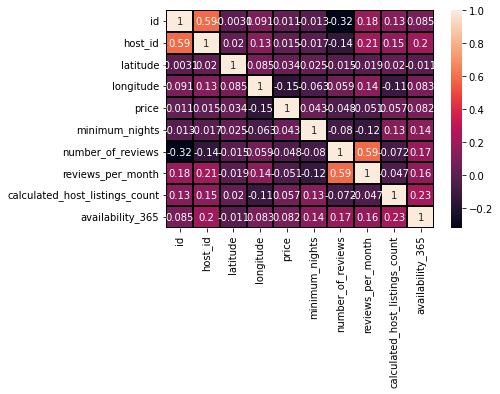

In [12]:
df_corr=df_airbnb[['id','host_id','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
sns.heatmap(df_corr,  vmin=None, vmax=None, center=None, robust=False, annot=True, fmt='.2g', annot_kws=None, linewidths=1, linecolor='black')

**From the above heat plot we can say that there are no strong corelation in between the different columns in the given data frame.**

# now we try to find out the average price(with outliers) in the different neighbourhood group with respect to different room types.

In [13]:
df_airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        67.022577
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.343521
                     Private room        76.590537
                     Shared room         51.267409
Manhattan            Entire home/apt    249.250680
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

In [14]:
df_avg_price=df_airbnb.groupby(['neighbourhood_group'])['price'].mean()
df_avg_price

neighbourhood_group
Bronx             87.636774
Brooklyn         124.451576
Manhattan        196.882864
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

we can plot this for the better understanding that hows price varies in different neighbourhood group for the different types of rooms.

Text(0.5, 0, 'different_neighbourhood')

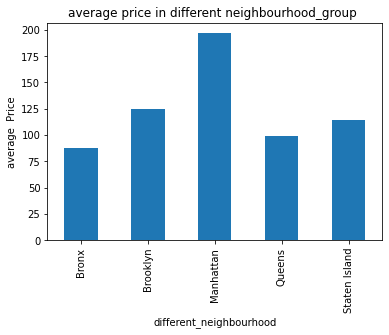

In [15]:
df_avg_price=df_airbnb.groupby(['neighbourhood_group'])['price'].mean()
df_avg_price.plot.bar()
plt.title('average price in different neighbourhood_group ')
plt.ylabel('average  Price')
plt.xlabel('different_neighbourhood')

Text(0.5, 0, 'different_neighbourhood')

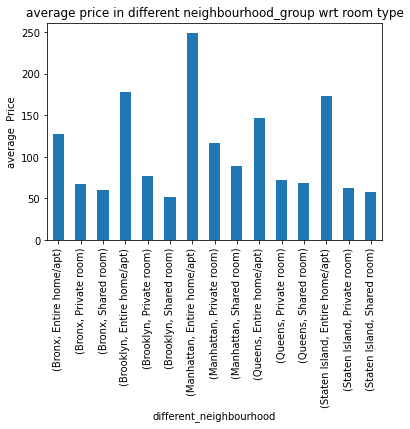

In [16]:
df_avg_price_room=df_airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean()

df_avg_price_room.plot.bar()

plt.title('average price in different neighbourhood_group wrt room type')
plt.ylabel('average  Price')
plt.xlabel('different_neighbourhood')

**from the above two bar graph we can conclude that manhattan have the highest average price and in manhattan the highest avg price is of the entire home/apartment as compare to others room type**

**Outliers treatment in price variable**

In [17]:
df_price=df_airbnb['price']
df_price.describe()

count    48895.000000
mean       152.755045
std        240.143242
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


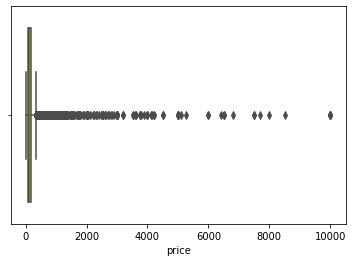

In [18]:
sns.boxplot(df_price,color='yellow',hue_order='smoker')

From the above plot we can say that our price column contain outliers.

In [19]:
IQR=175-69
upper_whisker= int(175+1.5*IQR)
Lower_whisker= int(69-1.5*IQR)
df_without_outlier = df_airbnb[Lower_whisker <= df_airbnb['price'] ]
df_without_outlier= df_airbnb[df_airbnb['price'] <=upper_whisker]
df_without_outlier

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,2019-05-21,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,2019-07-08,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,2019-07-08,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,2019-07-08,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,2019-07-08,0.00,6,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


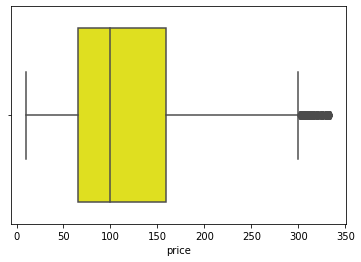

In [20]:
sns.boxplot(df_without_outlier['price'],color='yellow')

**now price column doesnot have outliers**

# now we try to find out the average price(without outliers) in the different neighbourhood group with respect to different room types

Text(0.5, 0, 'different_neighbourhood')

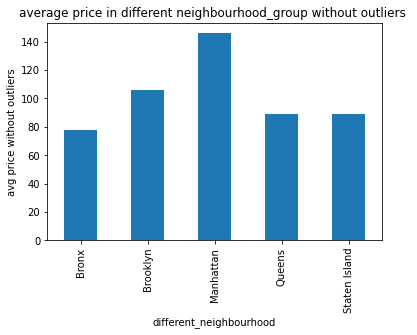

In [21]:
df_avg_price=df_without_outlier.groupby(df_without_outlier['neighbourhood_group'])['price'].mean()
df_avg_price.plot.bar()
plt.title('average price in different neighbourhood_group without outliers ')
plt.ylabel('avg price without outliers')
plt.xlabel('different_neighbourhood')

In [22]:
df_avg_price

neighbourhood_group
Bronx             77.508150
Brooklyn         105.770408
Manhattan        145.960664
Queens            88.904437
Staten Island     89.235616
Name: price, dtype: float64

Text(0.5, 0, 'different_neighbourhood')

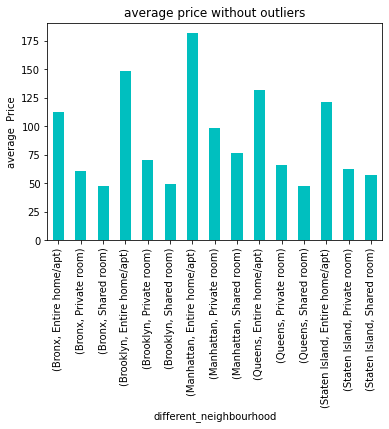

In [23]:
df_avg_price_room_type=df_without_outlier.groupby(['neighbourhood_group','room_type'])['price'].mean()
df_avg_price_room_type.plot.bar(color ='c')

plt.title('average price without outliers')
plt.ylabel('average  Price')
plt.xlabel('different_neighbourhood')

In [24]:
df_avg_price_room_type

neighbourhood_group  room_type      
Bronx                Entire home/apt    112.195592
                     Private room        60.831358
                     Shared room         47.254237
Brooklyn             Entire home/apt    148.219159
                     Private room        70.374510
                     Shared room         48.779659
Manhattan            Entire home/apt    181.702118
                     Private room        98.057700
                     Shared room         75.939785
Queens               Entire home/apt    131.328388
                     Private room        65.732319
                     Shared room         46.989691
Staten Island        Entire home/apt    121.089286
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

**After removal of the outliers, the average price in Manhattan decreased from 196 dollars to 145 dollars accordingly and the average price for the entire home/apt also decreased from 250 dollars to 181 dollars approximately**

# different type of room_type available in different area

Text(0, 0.5, 'number of room types')

<Figure size 864x432 with 0 Axes>

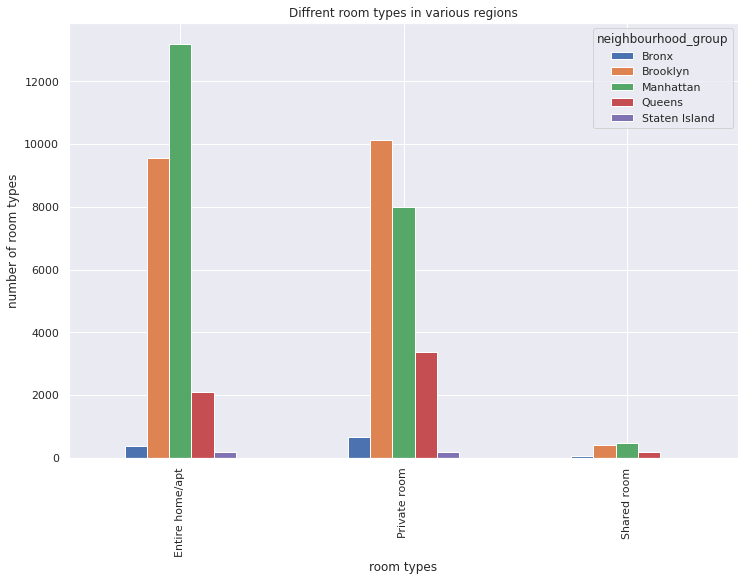

In [ ]:
neighbourhood_room_type = df_airbnb.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack(0)
fig=plt.figure(figsize = (12,6));
plt_3 = neighbourhood_room_type.plot(kind='bar')
plt.title('Diffrent room types in various regions')
plt.xlabel('room types')
plt.ylabel('number of room types')

**From the above plot we can say in manhatten the entire home room_type are high in number whereas when it comes to private room types we can say Brooklyn is in the lead .**

# now we have to see that total number of host listed in different neighbourhood groups.

Text(0.5, 0, 'different_neighbourhood group')

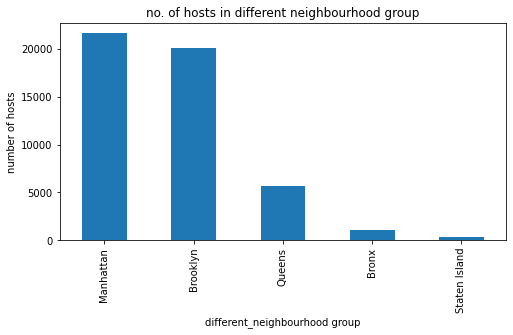

In [ ]:
df_airbnb['neighbourhood_group'].value_counts().plot.bar(figsize = (8,4),fontsize = 10)
plt.title('no. of hosts in different neighbourhood group')
plt.ylabel('number of hosts')
plt.xlabel('different_neighbourhood group')

**from the above  plots i.e, total number of host and average price in different neighbourhood we can conclude that Manhattan is the most profitable place with respect to others because it has the highest number of hosts as well as highest average price**

# now we try to find out top 10 busiest host.
**considering that which ever host the maximum number of properties listed would be the busiest host**

In [ ]:
y=df_airbnb.groupby(['host_name'])['calculated_host_listings_count'].max().reset_index()
df_busiest_hosts = y.sort_values(['calculated_host_listings_count'],ascending=False).head(10)


In [ ]:
df_busiest_hosts

,host_name,calculated_host_listings_count
9782,Sonder (NYC),327
1357,Blueground,232
5337,Kara,121
5472,Kazuya,103
9781,Sonder,96
4810,Jeremy & Laura,96
2124,Corporate Housing,91
5525,Ken,87
8396,Pranjal,65
7224,Mike,52


Text(0.5, 1.0, 'top 10 busiest host')

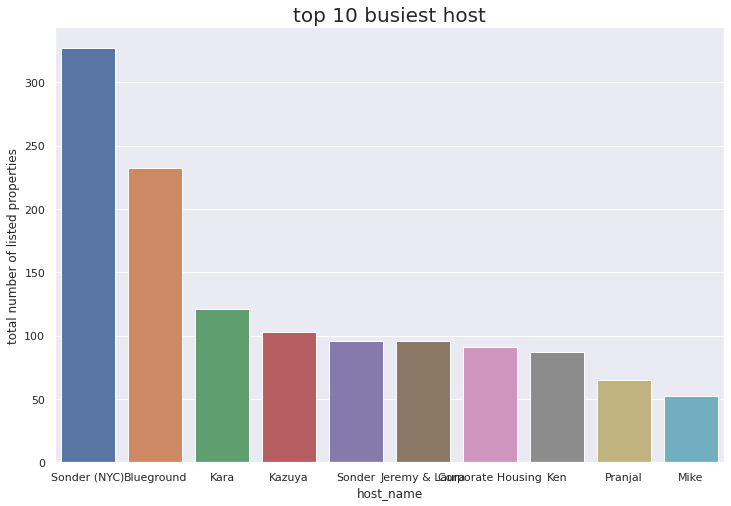

In [ ]:
# now plotting the top 10 busiest host list for the better visualization.
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,8)})
ax=sns.barplot(x="host_name", y="calculated_host_listings_count", data=df_busiest_hosts)
plt.xlabel('host_name')
plt.ylabel('total number of listed properties')
plt.title('top 10 busiest host',fontsize=20)

**Sonder (NYC) is the busiest host because it has the maximum number of listing of the properties i.e,327**

# 